In [84]:
from enum import Enum
import re #for affinity patcher

import numpy as np
import pandas as pd
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import matplotlib.backends.backend_svg as svg

from svgpath2mpl import parse_path #for custom markers

import matplotlib.font_manager as mfm # for greek font

# to smooth datapoints
import scipy as sp
#import scipy.interpolate
from scipy.interpolate import BSpline, make_interp_spline

In [85]:
'''
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm


seguihis = 'C:\\WINDOWS\\Fonts\\seguihis.ttf'
prop_seguihis = mfm.FontProperties(fname=seguihis)

seguisym = 'C:\\WINDOWS\\Fonts\\seguisym.ttf'
prop_seguisym = mfm.FontProperties(fname=seguisym)
'''

"\nfrom fontTools.ttLib import TTFont\nimport matplotlib.font_manager as mfm\n\n\nseguihis = 'C:\\WINDOWS\\Fonts\\seguihis.ttf'\nprop_seguihis = mfm.FontProperties(fname=seguihis)\n\nseguisym = 'C:\\WINDOWS\\Fonts\\seguisym.ttf'\nprop_seguisym = mfm.FontProperties(fname=seguisym)\n"

In [86]:
def set_save_image(fig, savename, dpi=1200):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # export text as font in svg (instead of curves)
    plt.rcParams['svg.fonttype'] = 'none'
    # plt.rcParams['font.family'] = 'Helvetica'

    # Remove borders on the plot axes
    for ax in fig.get_axes():
       ax.spines['bottom'].set_visible(False)
       ax.spines['left'].set_visible(False)
       ax.spines['top'].set_visible(False)
       ax.spines['right'].set_visible(False)
       ax.axis('off')
       ax.set_global()
       # print(ax.get_xlim())
       ax.set_xlim([-14000000,14000000])
       ax.set_ylim([-14000000,14000000])
       try:
           ax.outline_patch.set_edgecolor('none')
           ax.background_patch.set_fill(False)
       except:
           pass 
        
    # Remove all padding and margins
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    elif savename.split('.')[-1] == 'svg':
        plt.savefig(savename, format='svg', transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.show()
    plt.clf()
    plt.close('all')

In [87]:
#see https://forum.affinity.serif.com/index.php?/topic/173734-font-sizes-in-imported-svg-documents-are-sometimes-interpreted-incorrectly/
def patch_affinity_svg(filepath):
    """Patch Matplotlib SVG so that it can be read by Affinity Designer."""

    with open(filepath, "r") as f:
        svg_text = f.read()

    matches = [
        x for x in re.finditer('font: ([0-9.]+)px ([^;]+);', svg_text)
    ]

    svg_pieces = [svg_text[: matches[0].start()]]
    for i, match in enumerate(matches):
        # Change "font" style property to separate "font-size" and
        # "font-family" properties because Affinity ignores "font".
        font_size_px, font_family = match.groups()
        new_font_style = (
            f'font-size: {float(font_size_px):.1f}px; '
            f'font-family: {font_family};'
        )
        svg_pieces.append(new_font_style)
        if i < len(matches) - 1:
            svg_pieces.append(svg_text[match.end() : matches[i + 1].start()])
        else:
            svg_pieces.append(svg_text[match.end() :])
    out = ''.join(svg_pieces)
        
    with open(filepath, 'w') as f:
        f.write(out)

In [88]:
class LowerThresholdPlateCarree(ccrs.PlateCarree):
    ''' Add a new class to increase resolution of Geodetic vectors '''
    @property
    def threshold(self):
        return 0.01
    @threshold.setter
    def threshold(self, new_threshold):
        return 0.01

### Visual Parameter

In [89]:
figsize = (10, 10)
magnitude_cutoff = 5.5
dec_cutoff = -10

size_factor_stars = 2.5
size_messier = 60

class Colors(Enum):
    SPACE ='#003147'
    C1='#FFE5AF'
    C2='#00A8D3'

In [90]:
#font for greek letters

seguisym = 'C:\\WINDOWS\\Fonts\\seguisym.ttf'
prop_seguisym = mfm.FontProperties(fname=seguisym)

### Import SVG Paths for markers

In [91]:
# star markers

#5.5 - 4.5 
stars_s1 = parse_path("""M1032.14,541.984C1069.92,541.984 1100.6,572.66 1100.6,610.443C1100.6,648.226 1069.92,678.901 1032.14,678.901C994.354,678.901 963.678,648.226 963.678,610.443C963.678,572.66 994.563,541.984 1032.14,541.984Z""")
stars_s1.vertices -= stars_s1.vertices.mean(axis=0)

#4.5 - 3.5
stars_s2 = parse_path("""M1032.14,541.984C1069.92,541.984 1100.6,572.66 1100.6,610.443C1100.6,648.226 1069.92,678.901 1032.14,678.901C994.354,678.901 963.678,648.226 963.678,610.443C963.678,572.66 994.453,541.984 1032.14,541.984Z""")
stars_s2.vertices -= stars_s2.vertices.mean(axis=0)

#3.5 - 2.5
stars_s3 = parse_path("""M526.608,136.566L549.633,177.703C550.23,178.769 550.972,179.749 551.836,180.613C552.7,181.477 553.68,182.218 554.746,182.815L595.883,205.84L554.746,228.865C553.68,229.462 552.7,230.204 551.836,231.068C550.972,231.932 550.23,232.912 549.633,233.978L526.608,275.115L503.583,233.978C502.986,232.912 502.245,231.932 501.381,231.068C500.517,230.204 499.537,229.462 498.471,228.865L457.334,205.84L498.471,182.815C499.537,182.218 500.517,181.477 501.381,180.613C502.245,179.749 502.986,178.769 503.583,177.703L526.608,136.566Z""")
stars_s3.vertices -= stars_s3.vertices.mean(axis=0)

#2.5 - 1.5
stars_s4 = parse_path("""M526.608,136.566L540.572,168.737C542.044,172.129 544.398,175.064 547.39,177.238C550.381,179.411 553.9,180.743 557.581,181.095L592.493,184.433L566.211,207.655C563.44,210.103 561.376,213.249 560.233,216.766C559.09,220.282 558.911,224.041 559.714,227.65L567.327,261.885L537.121,244.065C533.936,242.186 530.306,241.195 526.608,241.195C522.911,241.195 519.281,242.186 516.096,244.065L485.89,261.885L493.503,227.65C494.306,224.041 494.126,220.282 492.984,216.766C491.841,213.249 489.777,210.103 487.006,207.655L460.724,184.433L495.636,181.095C499.317,180.743 502.836,179.411 505.827,177.238C508.819,175.064 511.173,172.129 512.645,168.737L526.608,136.566Z""")
stars_s4.vertices -= stars_s4.vertices.mean(axis=0)

#1.5 - 0.5
stars_s5 = parse_path("""M526.608,136.566L531.27,162.489C532.473,169.18 536.563,175.001 542.451,178.4C548.339,181.799 555.425,182.431 561.821,180.128L586.602,171.203L566.483,188.201C561.29,192.589 558.294,199.042 558.294,205.84C558.294,212.639 561.29,219.092 566.483,223.479L586.602,240.478L561.821,231.553C555.425,229.249 548.339,229.881 542.451,233.281C536.563,236.68 532.473,242.501 531.27,249.192L526.608,275.115L521.947,249.192C520.744,242.501 516.653,236.68 510.766,233.281C504.878,229.881 497.792,229.249 491.396,231.553L466.615,240.478L486.734,223.479C491.927,219.092 494.923,212.639 494.923,205.84C494.923,199.042 491.927,192.589 486.734,188.201L466.615,171.203L491.396,180.128C497.792,182.431 504.878,181.799 510.766,178.4C516.653,175.001 520.744,169.18 521.947,162.489L526.608,136.566Z""")
stars_s5.vertices -= stars_s5.vertices.mean(axis=0)

#0.5 and below
stars_s6 = parse_path("""M526.608,136.566L528.853,156.562C529.631,163.499 534.119,169.465 540.569,172.137C547.019,174.808 554.411,173.763 559.867,169.408L575.593,156.856L563.041,172.582C558.686,178.038 557.64,185.43 560.312,191.88C562.984,198.33 568.95,202.818 575.887,203.596L595.883,205.84L575.887,208.085C568.95,208.863 562.984,213.351 560.312,219.801C557.64,226.251 558.686,233.643 563.041,239.099L575.593,254.825L559.867,242.273C554.411,237.918 547.019,236.872 540.569,239.544C534.119,242.216 529.631,248.182 528.853,255.119L526.608,275.115L524.364,255.119C523.586,248.182 519.098,242.216 512.648,239.544C506.198,236.872 498.806,237.918 493.35,242.273L477.624,254.825L490.176,239.099C494.531,233.643 495.576,226.251 492.905,219.801C490.233,213.351 484.267,208.863 477.33,208.085L457.334,205.84L477.33,203.596C484.267,202.818 490.233,198.33 492.905,191.88C495.576,185.43 494.531,178.038 490.176,172.582L477.624,156.856L493.35,169.408C498.806,173.763 506.198,174.808 512.648,172.137C519.098,169.465 523.586,163.499 524.364,156.562L526.608,136.566Z""")
stars_s6.vertices -= stars_s6.vertices.mean(axis=0)

# messier objects

galaxy = parse_path("""m 345.22172,109.01951
c 2.36491,2.09835 1.43078,5.08341 1.18058,6.0872 -0.8165,3.33967 -0.35399,1.33546 -3.32719,13.34991 -0.78302,3.1565 -4.90777,19.84439 1.6059,40.62912 5.25118,16.77686 16.17358,26.58561 17.8773,28.16916 15.30207,14.19312 15.26417,14.1965 30.504,28.41887 17.85011,16.66869 46.42292,-1.63386 39.2169,-24.85566 -0.27755,-0.88563 -1.86804,-6.00221 -6.04722,-9.95401 -21.51761,-20.33417 -21.59279,-20.18049 -22.48641,-21.16768 -3.95418,-4.39384 -4.02284,-6.66365 -4.58299,-10.10822 -0.67959,-4.23998 3.12259,-13.29848 13.65354,-13.62539 3.49427,-0.098 7.06343,1.51365 9.8046,3.67329 2.9908,2.3555 20.34618,19.14415 22.11382,20.80735 33.1182,31.22993 11.94365,87.80566 -33.67196,88.61841 -14.89954,0.26581 -27.69234,-6.024 -36.11255,-14.24924 -16.10879,-15.75229 -32.75894,-31.57488 -38.66453,-39.50267 -22.18863,-29.76688 -16.00677,-58.82378 -14.91767,-63.96581 3.77028,-17.69469 10.12291,-26.21712 12.61661,-29.21789 1.88719,-2.26394 3.06773,-3.75842 5.04496,-4.34715 3.24921,-0.96287 4.4036,-0.34505 6.19231,1.24041
z

m 132.00493,149.19528
c -2.3508,-2.09486 -1.4259,-5.08858 -1.1806,-6.08719 0.8165,-3.33968 0.354,-1.33547 3.3272,-13.34991 0.783,-3.15651 4.9126,-19.84958 -1.601,-40.6343 -5.2561,-16.77169 -16.17362,-26.58562 -17.88221,-28.16399 -15.30206,-14.19312 -15.25496,-14.18783 -30.49912,-28.42404 -17.85498,-16.66352 -46.42779,1.63903 -39.2169,24.85565 0.27267,0.89081 1.86316,6.0074 6.05155,9.96785 21.51327,20.32034 21.59766,20.17532 22.47721,21.15903 3.96826,4.39732 4.0277,6.65847 4.58298,10.10821 0.67959,4.23999 -3.10851,13.30197 -13.65354,13.62539 -3.48505,0.10671 -7.06343,-1.51365 -9.80459,-3.67329 -2.99081,-2.3555 -20.34619,-19.14415 -22.11382,-20.80735 -33.11823,-31.22992 -11.94365,-87.80566 33.67196,-88.61841 14.9044,-0.27098 27.6972,6.01882 36.11255,14.24924 16.11799,15.76096 32.76383,31.56971 38.67863,39.50616 22.1745,29.76339 15.9975,58.81512 14.9084,63.95715 -3.7659,17.70853 -10.1229,26.21711 -12.6214,29.22306 -1.8872,2.26394 -3.0678,3.75842 -5.045,4.34715 -3.24,0.97154 -4.4036,0.34505 -6.1923,-1.24041
z""")
galaxy.vertices -= galaxy.vertices.mean(axis=0)

nebular = parse_path("""m 182.25726,54.199502
c 5.35165,5.35164 5.35336,14.04289 0.002,19.39472 -5.34991,5.34992 -14.04116,5.3482 -19.3928,-0.003
L 139.6217,50.346462
c -5.35164,-5.35164 -5.35028,-14.03981 -3.6e-4,-19.38973 5.35183,-5.35183 14.04,-5.35319 19.39165,-0.002
z

m 20.53104,77.901108
c 5.3516,5.35164 5.3502,14.03982 0,19.39165 -5.35183,5.35183 -14.04001,5.3532 -19.39165,0.002
L 138.09059,106.1882
c -5.34857,-5.34857 -5.35029,-14.039818 0.002,-19.391648 5.35183,-5.35184 14.04308,-5.35012 19.39165,-0.002
z

M 126.48201,55.794362
c 5.35164,5.35165 5.35335,14.0429 0.002,19.39473 -5.35183,5.35183 -14.04308,5.35012 -19.39473,-0.002
L 79.267502,47.365312
c -5.35165,-5.35164 -5.35336,-14.04289 -0.002,-19.39472 5.35183,-5.35184 14.043083,-5.35013 19.394723,0.002
z

m 9.26515,67.084138
c 5.35164,5.35164 5.35028,14.03982 3.6e-4,19.38973 -5.35183,5.35183 -14.04001,5.3532 -19.39165,0.002
L 72.651292,98.565222
c -5.35164,-5.35165 -5.35028,-14.03982 0.002,-19.39166 5.34992,-5.34991 14.03809,-5.35127 19.38974,3.7e-4
z

m 22.14871,28.36759
c 7.1217,-0.003 13.53127,6.06171 13.53127,13.53126 0,7.46955 -6.06349,13.53304 -13.53304,13.53304 -7.46955,0 -13.53127,-6.06171 -13.53127,-13.53126 0,-7.46955 6.06349,-13.53305 13.53304,-13.53304
z

M 203.9078,81.731252
c 7.1247,5e-4 13.5343,6.06478 13.5343,13.53433 0,7.469548 -6.0635,13.533048 -13.5331,13.533048 -7.4695,-1e-5 -13.53429,-6.06479 -13.53429,-13.534338 0,-7.46955 6.06349,-13.53305 13.53309,-13.53304
z""")
nebular.vertices -= nebular.vertices.mean(axis=0)

globular_cluster = parse_path("""m 581.31017,203.75455
c 25.64896,-25.64896 56.05864,-40.56949 81.61385,-43.20728 19.93635,-2.06147 37.26185,3.12385 49.18365,15.0457 11.9219,11.92185 17.1049,29.24504 15.0457,49.18365 -2.64,25.55295 -17.5606,55.96263 -43.20955,81.61159 -25.65275,25.65275 -56.05863,40.56949 -81.61538,43.21333 -19.9386,2.05922 -37.26179,-3.12385 -49.18364,-15.0457 -11.92185,-11.92185 -17.10717,-29.2473 -15.0457,-49.18364 2.64158,-25.559 17.55832,-55.96489 43.21107,-81.61765
z

m 19.57154,19.57155
c -20.51158,20.51158 -33.1428,44.4524 -35.25513,64.89144 -1.11008,10.73431 0.66732,20.35237 7.08574,26.77079 6.41841,6.41841 16.03421,8.19355 26.76852,7.08347 20.43904,-2.11233 44.37986,-14.74354 64.89145,-35.25513 20.51158,-20.51158 33.13908,-44.44861 35.25138,-64.88765 1.1101,-10.73432 -0.6651,-20.35012 -7.0835,-26.76853 -6.4184,-6.41842 -16.0365,-8.19582 -26.77081,-7.08574 -20.43904,2.11233 -44.37986,14.74355 -64.88765,35.25135
z""")
globular_cluster.vertices -= globular_cluster.vertices.mean(axis=0)

open_cluster = parse_path("""m 847.70709,366.64231
c 8.70589,-9.69664 18.65747,-4.98138 22.117,0.0194 5.05713,4.94726 2.76553,15.54818 -5.95501,23.86555 -9.74151,11.52465 -21.06641,22.74068 -33.39867,30.77441 -12.07567,4.17902 -20.19707,-3.88316 -19.32974,-14.51686 0.90904,-8.50548 12.14407,-12.86255 18.07243,-19.49191 6.80913,-6.32118 13.08293,-13.30803 18.49399,-20.65057
z

m -71.90241,50.60752
c 11.03009,-1.48519 19.14303,6.62994 15.58645,18.5665 -4.69067,10.04416 -15.01138,8.9506 -21.67859,10.02003 -20.64377,1.4628 -38.42141,-4.54133 -48.57978,-17.63775 -4.09039,-4.15059 -1.36247,-18.03849 9.10811,-20.05949 11.46428,-2.10309 14.25617,8.48519 23.82208,9.56225 6.36068,1.56112 13.8819,1.22416 21.74173,-0.45154
z

M 736.66314,376.5882
c -3.42967,12.55028 -18.8889,12.62535 -22.46424,7.20514 -6.58552,-4.4738 -4.89902,-15.138 -0.82905,-25.23915 4.67236,-12.80999 11.41865,-26.38153 21.25656,-38.52618 10.24064,-7.64566 18.58827,-1.84997 21.65561,4.16205 4.53661,5.72777 -1.78022,15.46403 -7.59862,23.6311 -5.73564,9.5854 -9.87423,19.44343 -12.02026,28.76704
z

m 51.43919,-71.46957
c -10.74026,6.27236 -18.46678,0.0717 -21.05359,-6.75883 -4.09439,-6.74852 4.50312,-17.56771 14.04522,-21.59547 14.3826,-8.70186 29.90039,-15.86572 43.35805,-17.09157 8.69158,1.11268 15.65598,8.5337 11.25398,19.81989 -5.84749,9.73039 -15.59755,7.32505 -23.43366,11.8933 -8.12338,3.39083 -16.3328,8.06993 -24.17,13.73268
z

m 73.45796,-12.38929
c -4.41308,-3.63046 -7.0098,-15.40647 3.79136,-21.78951 12.20096,-4.82469 17.56364,4.01711 22.03838,10.46631 8.32859,13.3788 11.43657,31.82476 5.78924,52.83523 -7.0322,12.42152 -19.95178,8.51364 -23.32353,3.04432 -6.12594,-5.6654 -0.0883,-18.16135 -1.30416,-26.78547 -0.4043,-7.19419 -2.75047,-13.39145 -6.99129,-17.77088
z""")
open_cluster.vertices -= open_cluster.vertices.mean(axis=0)

cluster_nebular = parse_path("""m 190.42309,235.23685
c 5.35165,5.35164 5.35336,14.04289 0.002,19.39472 -5.34991,5.34992 -14.04115,5.3482 -19.39279,-0.003
l -23.24476,-23.24476
c -5.35164,-5.35164 -5.35028,-14.03981 -3.6e-4,-19.38973 5.35183,-5.35183 14.04,-5.35319 19.39165,-0.002
z

m 20.53099,77.90111
c 5.35165,5.35164 5.35028,14.03982 -0.002,19.39165 -5.35183,5.35183 -14.04001,5.3532 -19.39165,0.002
l -45.30605,-45.30606
c -5.34857,-5.34857 -5.35029,-14.03982 0.002,-19.39165 5.35183,-5.35184 14.04308,-5.35012 19.39165,-0.002
z

m -76.30623,-76.30625
c 5.35164,5.35165 5.35335,14.0429 0.002,19.39473 -5.35183,5.35183 -14.04308,5.35012 -19.39473,-0.002
L 87.433349,228.40266
c -5.35165,-5.35164 -5.35336,-14.04289 -0.002,-19.39472 5.351826,-5.35184 14.043081,-5.35013 19.394721,0.002
z

m 9.26515,67.08414
c 5.35164,5.35164 5.35028,14.03982 3.6e-4,19.38973 -5.35183,5.35183 -14.04001,5.3532 -19.39165,0.002
L 80.817139,279.60257
c -5.35164,-5.35165 -5.35028,-14.03982 0.002,-19.39166 5.34992,-5.34991 14.038086,-5.35127 19.389741,3.7e-4
z

m 22.14871,28.36759
c 7.1217,-0.003 13.53126,6.06171 13.53126,13.53126 0,7.46955 -6.06348,13.53304 -13.53303,13.53304 -7.46955,0 -13.53127,-6.06171 -13.53127,-13.53126 0,-7.46955 6.06349,-13.53305 13.53304,-13.53304
z

m 46.01187,-69.51484
c 7.12478,5e-4 13.53434,6.06478 13.53434,13.53433 0,7.46955 -6.06349,13.53305 -13.53304,13.53305 -7.46955,-1e-5 -13.53434,-6.06479 -13.53434,-13.53434 0,-7.46955 6.06349,-13.53305 13.53304,-13.53304
z

m 26.39015,70.72019
c 4.4989,-6.09733 13.1016,-7.39647 19.1978,-2.90006 6.0993,4.49949 7.3979,13.09882 2.9021,19.19923 -5.0187,6.80147 -10.7323,13.46802 -17.1046,19.84034 -6.3743,6.37425 -13.0389,12.08597 -19.84037,17.10458 -6.1004,4.49584 -14.69974,3.19725 -19.19923,-2.90204 -4.49641,-6.09621 -3.19727,-14.69891 2.90007,-19.19783 5.73472,-4.22851 11.35188,-9.04646 16.72482,-14.4194 5.37293,-5.37293 10.19088,-10.99009 14.41941,-16.72482
z

m -71.90248,50.60657
c 7.41459,-1.57419 14.70963,3.16196 16.28605,10.5736 1.57449,7.41355 -3.16231,14.70784 -10.57381,16.28511 -23.38194,4.96934 -44.1527,0.50346 -57.86718,-12.63557 -5.47289,-5.2427 -5.65621,-13.94292 -0.41811,-19.40848 5.24961,-5.47708 13.94647,-5.66541 19.41744,-0.4208 7.78629,7.4602 19.88115,8.42938 33.15561,5.60614
z

m 85.75868,-124.52043
c -5.2446,-5.47097 -5.0563,-14.16783 0.4131,-19.40977 5.4713,-5.24385 14.1696,-5.05861 19.4123,0.41427 13.141,13.71257 17.6107,34.47949 12.6394,57.86335 -1.5772,7.41151 -8.8715,12.14831 -16.2851,10.57382 -7.4116,-1.57642 -12.1478,-8.87147 -10.5736,-16.28606 2.8233,-13.27446 1.8541,-25.36932 -5.6061,-33.15561
z""")
cluster_nebular.vertices -= cluster_nebular.vertices.mean(axis=0)

In [92]:
stars = pd.read_csv('./data/processed/hygdata_processed_mag65.csv')
asterisms = pd.read_csv('./data/processed/asterisms.csv')
constellations = pd.read_csv('./data/processed/constellations.csv')
const_names = pd.read_csv('./data/processed/centered_constellations.csv', encoding="latin-1")
messiers = pd.read_csv('./data/processed/messier_ngc_processed.csv')
sun_positions = pd.read_csv('./data/sun_positions.csv')
#display(messiers.head())

# kick dimm stars
stars = stars.loc[stars["mag"] < magnitude_cutoff]

# kick everything that's not in the northern hemisphere
stars = stars.loc[stars["dec"] >= dec_cutoff]
messiers = messiers.loc[messiers["dec"] >= dec_cutoff]

print(len(stars), 'stars to plot')
print(len(asterisms), 'asterisms to plot')
# print(len(constellations), 'constellations to plot')
print(len(const_names), 'constellation names to plot')
print(len(messiers), 'messier objects to plot')
print(len(messiers[pd.notnull(messiers['proper_name'])]), 'named messiers to plot')

1553 stars to plot
88 asterisms to plot
88 constellation names to plot
43 messier objects to plot
10 named messiers to plot


In [93]:
#helper functions for plotting

def get_star_color(mag: float):
    '''
    if mag < 0.5:
        return Colors.S6.value
    elif mag < 1.5:
        return Colors.S5.value
    elif mag < 2.5:
        return Colors.S4.value
    elif mag < 3.5:
        return Colors.S3.value
    elif mag < 4.5:
        return Colors.S2.value
    elif mag < 5.5:
        return Colors.S1.value
    '''

    return Colors.C2.value

def get_star_marker(mag: float):
    if mag < 0.5:
        return stars_s6
    elif mag < 1.5:
        return stars_s5
    elif mag < 2.5:
        return stars_s4
    elif mag < 3.5:
        return stars_s3
    elif mag < 4.5:
        return stars_s2
    elif mag < 5.5:
        return stars_s1

# keeping naming scheme from eleanore lutz
def get_messier_marker(type: str):
    match type:
        case "spiral galaxy":
            return galaxy
        case "globular cluster":
            return globular_cluster
        case "open cluster":
            return open_cluster
        case "emission nebula, open cluster":
            return cluster_nebular
        case "emission nebula":
            return nebular
        # the data set also contains a type "star cluster", however, this object is located below the northern horizon, so I don't care about it for now.
    raise Exception("no match!") 


def get_star_size(mag: float):
 
    size_bonus = 6.5 - mag

    if mag < 0.5:
        return (16 + size_bonus) * size_factor_stars
    elif mag < 1.5:
        return (11 + size_bonus)* size_factor_stars
    elif mag < 2.5:
        return (8 + size_bonus)* size_factor_stars
    elif mag < 3.5:
        return (5 + size_bonus)* size_factor_stars
    elif mag < 4.5:
        return (1.4 + size_bonus)* size_factor_stars
    elif mag < 5.5:
        return (0.7 + size_bonus)* size_factor_stars

## Plotting the Stars

### Plot Grid

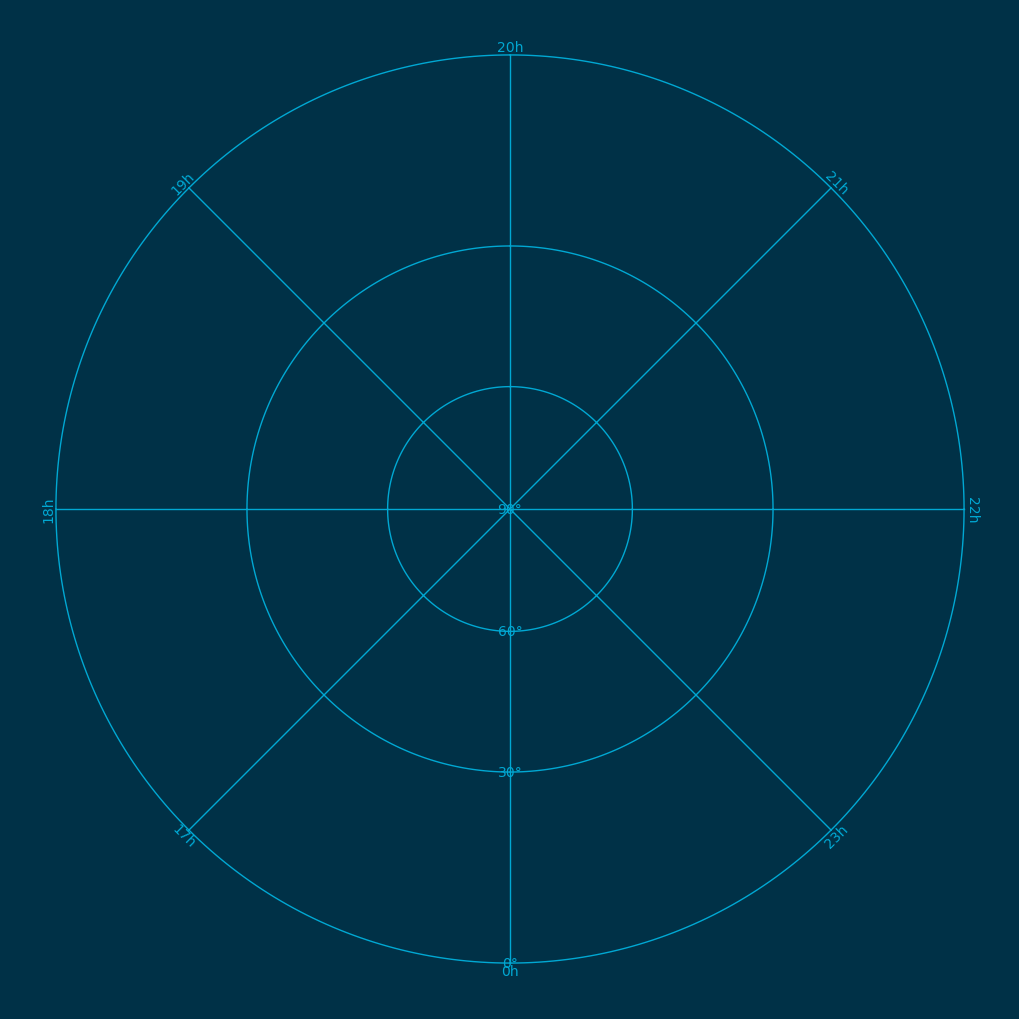

In [94]:
fig = plt.figure(figsize=figsize, facecolor=Colors.SPACE.value)
ax = plt.axes(projection=ccrs.Stereographic(90))

# plot gridlines

i = 0
RA_lable = 24
while i < 360:
    ax.plot([i, 0], [0, 90], transform=ccrs.Geodetic(), lw=1, alpha=1, color=Colors.C2.value, zorder=0.01)

    lable_rotation = 180 + i
    if lable_rotation < 270 or lable_rotation > 450:
        lable_rotation = i

    if RA_lable == 24:
        plt.text(i, 0 - 1, str(0) + "h", transform=ccrs.Geodetic(), horizontalalignment='center', va='center', rotation = lable_rotation, color=Colors.C2.value)
    else:
        plt.text(i, 0 - 1, str(RA_lable) + "h", transform=ccrs.Geodetic(), horizontalalignment='center', va='center', rotation=lable_rotation, color=Colors.C2.value)
    RA_lable -= 1
    
    j = 0
    while j <= 90:

        if i == 0:
            plt.text(0, j, str(j) + "°", transform=ccrs.Geodetic(), horizontalalignment='center', va='center', color=Colors.C2.value)
        
        RA_grid = np.array([i, i + 15, i + 30, i + 45]) # at least 4 points are needed for cubic interpolation...
        DEC_grid = np.array([j, j, j, j])

        RA_grid_DEC_grid_Spline = make_interp_spline(RA_grid, DEC_grid)
        
        RA_grid_ = np.linspace(RA_grid.min(), RA_grid.max(), 50)
        DEC_grid_ = RA_grid_DEC_grid_Spline(RA_grid_)
        
        ax.plot(RA_grid_, DEC_grid_, transform=ccrs.Geodetic(), lw=1, alpha=1, color=Colors.C2.value)
        j += 30
    i += 45

ax.set_xlim(ax.get_xlim()[::-1])

filepath = './figures/grid.svg'

set_save_image(fig, filepath)
patch_affinity_svg(filepath)

### Plot Ecliptic

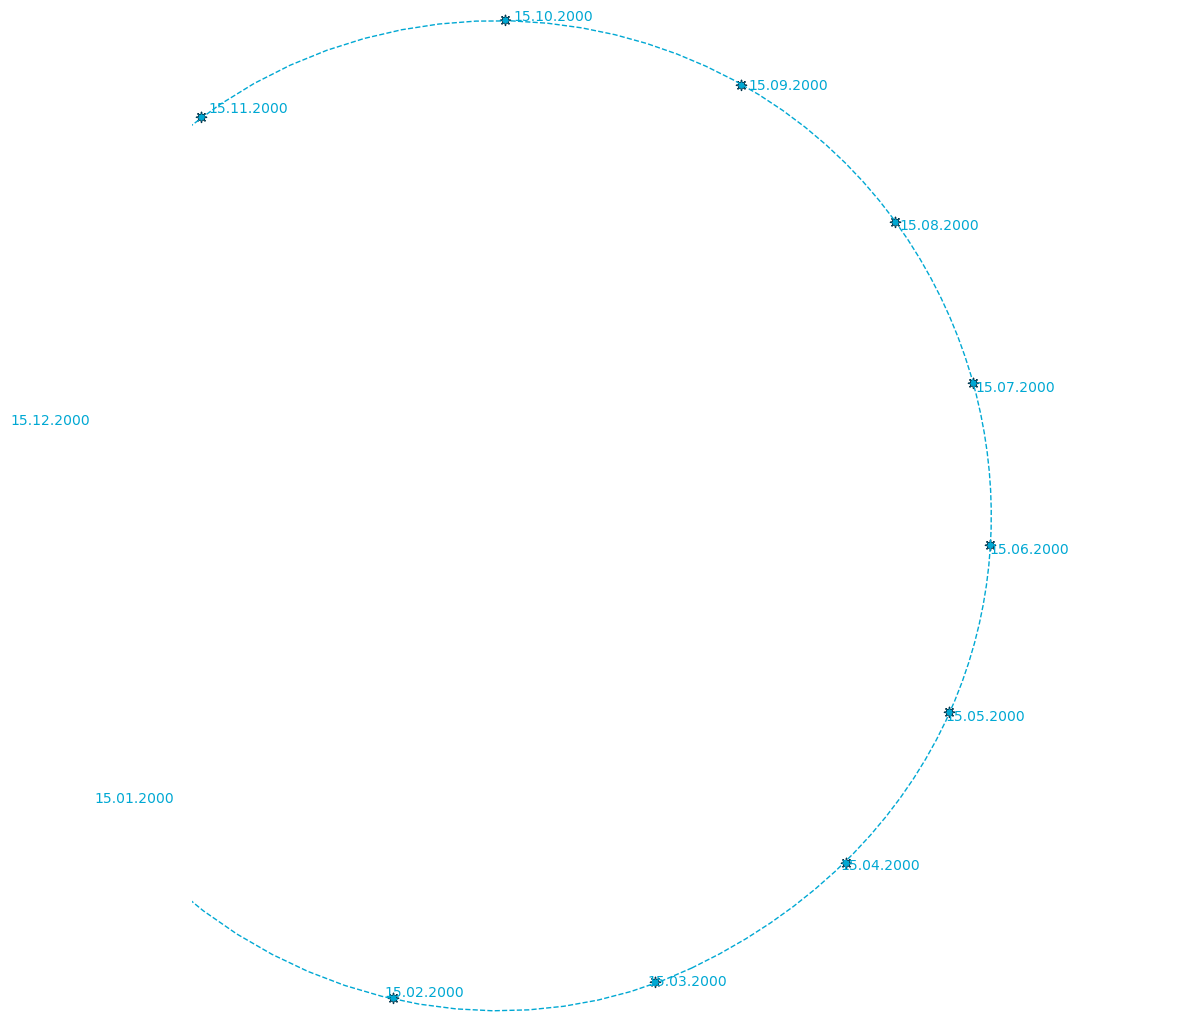

In [95]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

# Datapoints Ecliptic
# todo: replace with sun positions!
RA = np.array([0,45,90,135, 180, 225, 270, 315, 360])
DEC = np.array([0,17,23.3,17,0,-17,-23.3,-17,0])

RA_ = np.linspace(RA.min(), RA.max(), 100)
DEC_ = sp.interpolate.interp1d(RA, DEC, kind="cubic")(RA_)

plt.plot(RA_, DEC_, transform=ccrs.Geodetic(), lw = 1, linestyle='dashed', color = Colors.C2.value)

# plot sun positions + dates
for index, row in sun_positions.iterrows():
    # *(-1)-180 flips the data

    #plt.plot (ra, dec, transform=ccrs.Geodetic(), color=get_star_color(-1), marker=get_star_marker(-1), markersize=get_star_size(-1))

    ax.scatter(row['ra'], row['dec'], transform=ccrs.Geodetic(), s = get_star_size(-1), marker = get_star_marker(-1,), color=get_star_color(-1), lw=1, edgecolor=Colors.SPACE.value, zorder=0) #outline
    ax.scatter(row['ra'], row['dec'], transform=ccrs.Geodetic(), s = get_star_size(-1), marker = get_star_marker(-1,), color=get_star_color(-1), lw=0, zorder=0)


    plt.text (row['ra'] - 1, row['dec'], str(row['date']), transform=ccrs.Geodetic(), horizontalalignment='left', va='center', color=Colors.C2.value)

ax.set_xlim(ax.get_xlim()[::-1])

filepath = './figures/ecliptic.svg'

set_save_image(fig, filepath)
patch_affinity_svg(filepath)

### Plot asterisms

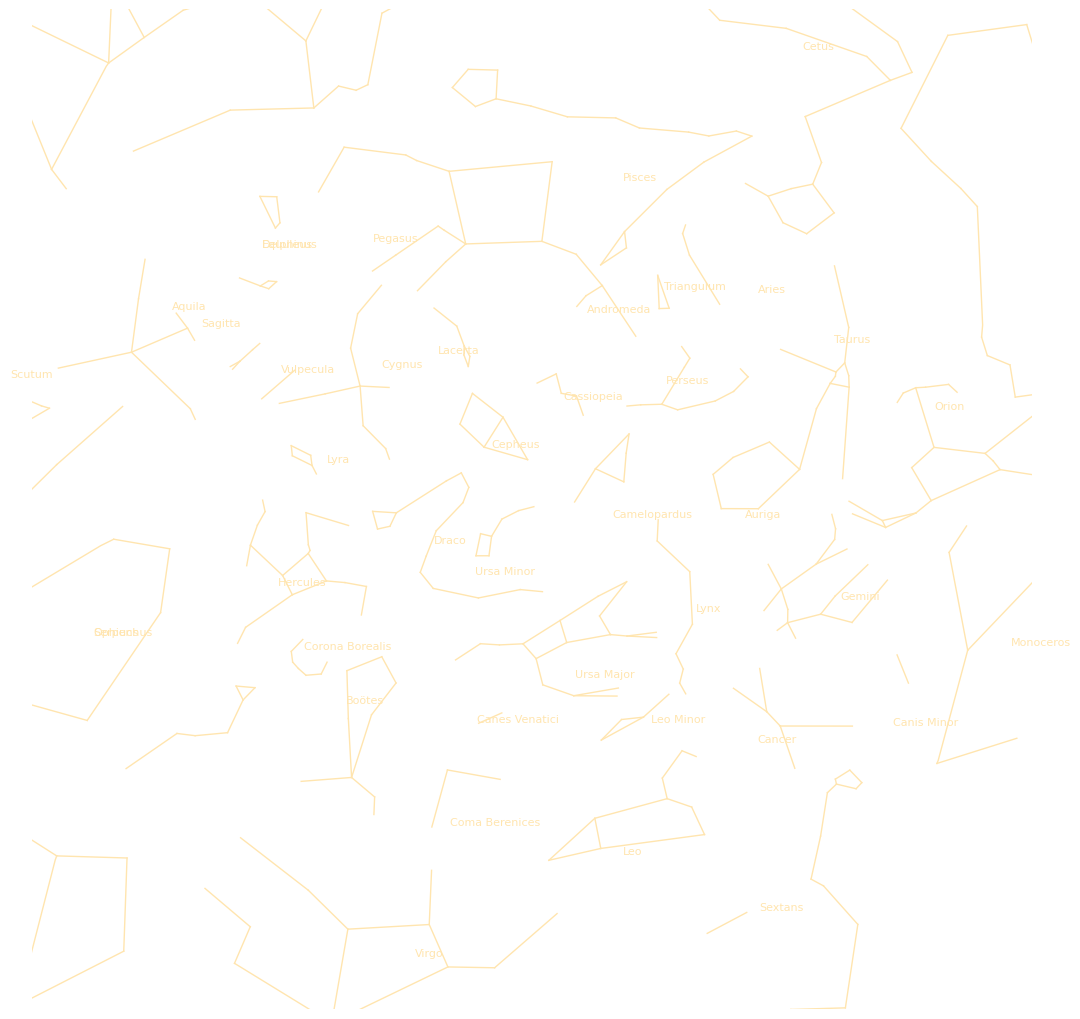

In [96]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

for index, row in asterisms.iterrows():
    # *(-1)-180 flips the data
    ras = [float(x)*360/24*(-1)-180 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = Colors.C1.value # todo - here we can differentiate between zidiac signs
    if row['zodiac'] == True: 
        color = Colors.C1.value
    assert len(asterisms)%2 == 0
    for n in range(int(len(asterisms)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=1, zorder=0.1)

# plot constellation limits

'''

for index, row in constellations.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=1, color=Colors.LIMITS.value)

'''

# plot asterism names

for index, row in const_names.iterrows():
    if row['dec'] >= -10: # todo we can simply this earilier
        ax.text(row['ra']*360/24*(-1)-180, row['dec'], row['name'], 
                transform=ccrs.Geodetic(), ha='left', va='top', fontsize=8, color=Colors.C1.value)

ax.set_xlim(ax.get_xlim()[::-1])

filepath = "./figures/asterisms.svg"

set_save_image(fig, filepath)
patch_affinity_svg(filepath)

### Plot nonvariable stars

535 labeled stars to plot


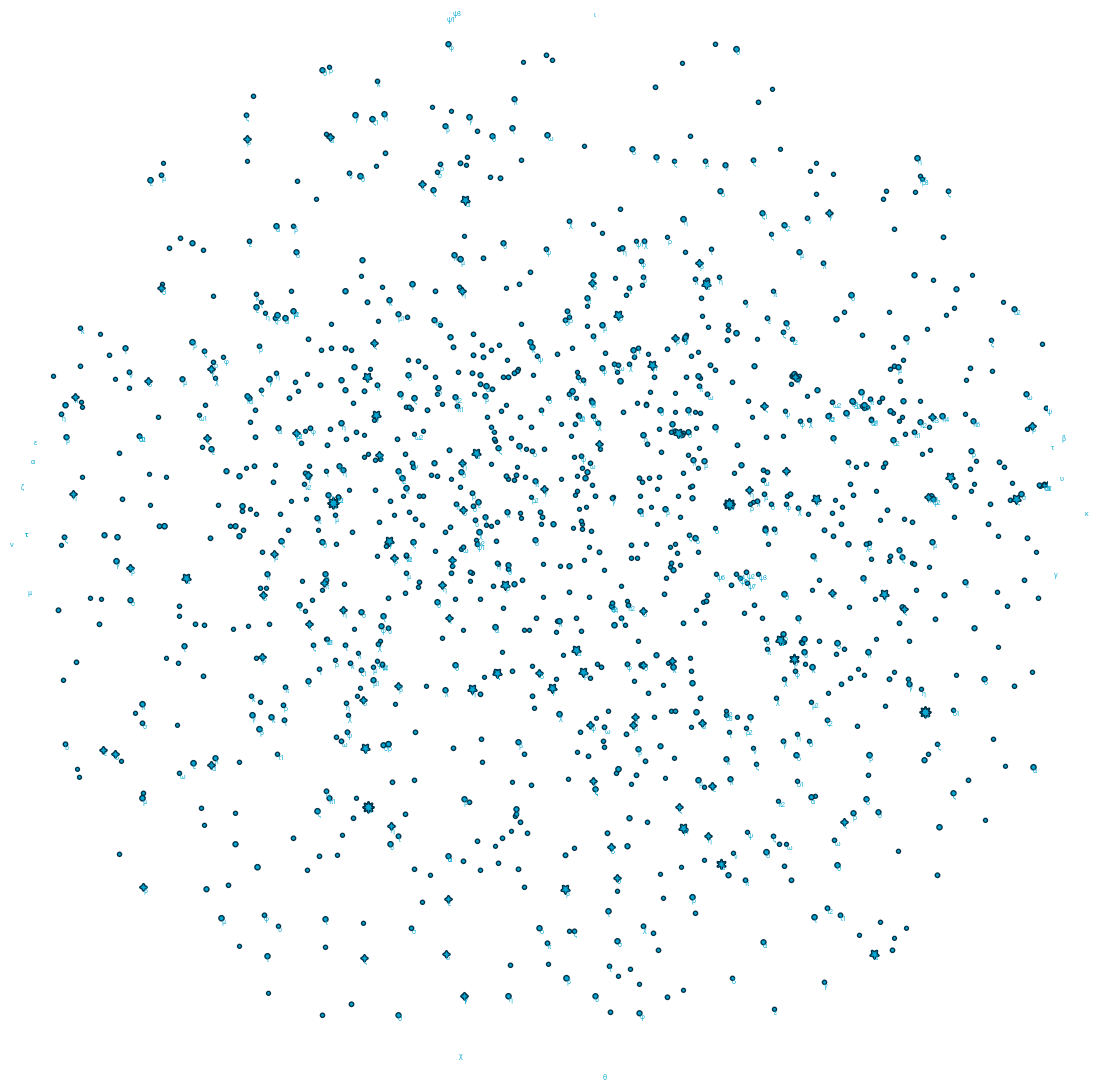

In [97]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

# split bayer stars from other nonvariable stars

stars_nonvar = stars[pd.isnull(stars['var'])]
stars_nonvar = stars_nonvar[stars_nonvar['color'] != '#000000'] #what does this line do?

bayers = stars_nonvar[pd.notnull(stars_nonvar['bayer'])] #bayer stars
print(len(bayers), 'labeled stars to plot')

stars_nonvar = stars_nonvar[pd.isnull(stars_nonvar['bayer'])]

# plot bayer stars

for index, row in bayers.iterrows(): 
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=Colors.SPACE.value, lw=2, edgecolor=Colors.SPACE.value, zorder=6.5-row['mag'])
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=get_star_color(row['mag']), lw=0, zorder=6.5-row['mag'])

# plot bayers designation lables

for index, row in bayers.iterrows(): 
    ax.text(row['ra']*360/24*(-1)-180, row['dec'], row['greek_letters'], transform=ccrs.Geodetic(), 
            ha='left', va='top', fontsize=5, color=Colors.C2.value, fontproperties=prop_seguisym, zorder=100)

#plot other nonvariable stars

for index, row in stars_nonvar.iterrows(): 
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=Colors.SPACE.value, lw=2, edgecolor=Colors.SPACE.value, zorder=6.5-row['mag'])
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=get_star_color(row['mag']), lw=0, zorder=6.5-row['mag'])

ax.set_xlim(ax.get_xlim()[::-1])

filepath = './figures/nonvariable_stars.svg'

set_save_image(fig, filepath)
patch_affinity_svg(filepath)

### Plot names of stars & messier objects

81 labeled stars to plot


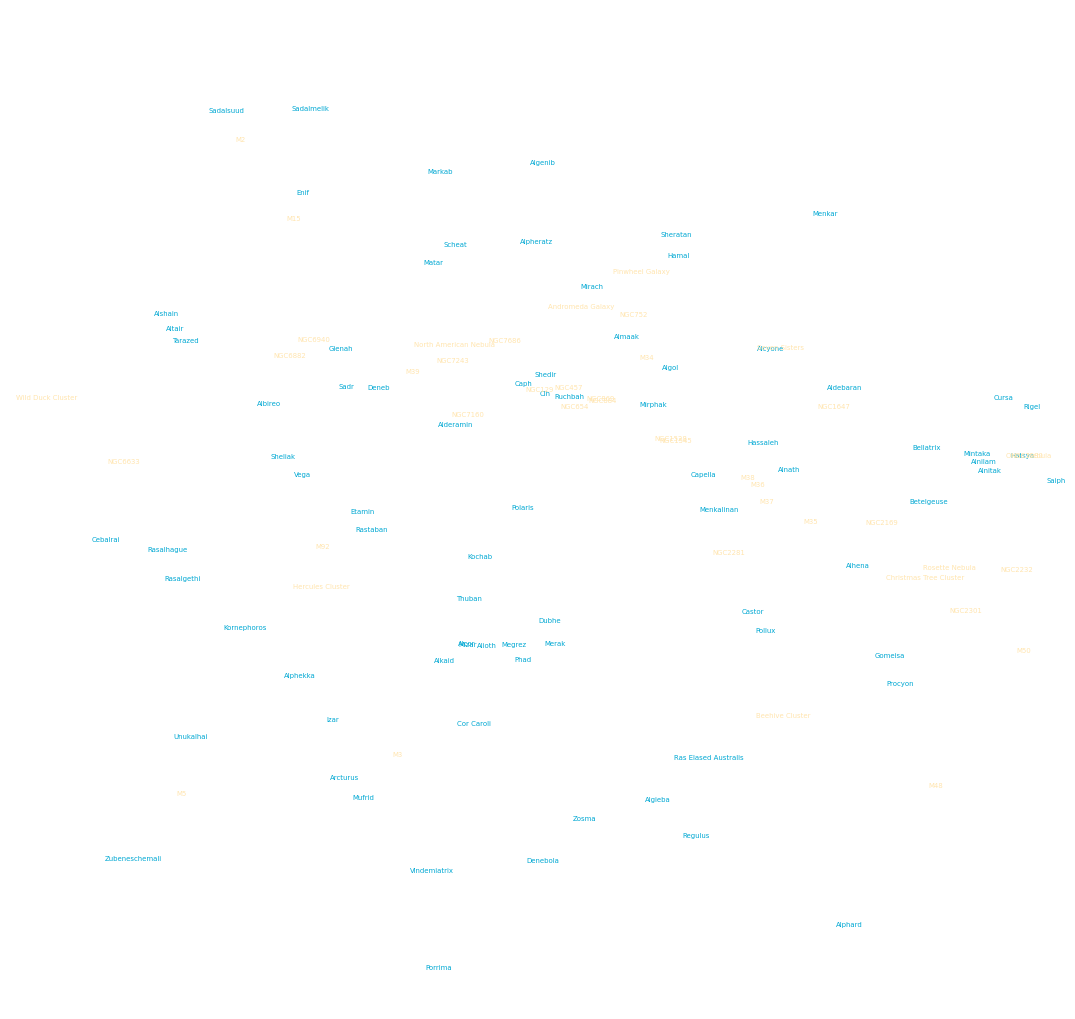

In [98]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

names = stars[pd.notnull(stars['proper'])]
print(len(names), 'labeled stars to plot')

for index, row in names.iterrows(): 
    ax.text(row['ra']*360/24*(-1)-180, row['dec'], row['proper'], color=Colors.C2.value, fontsize=5, ha='left', va='center', transform=ccrs.Geodetic())
    
for index, row in messiers.iterrows(): 
    ax.text(row['ra']*360/24*(-1)-180, row['dec'], row['name_2'], color=Colors.C1.value, fontsize=5, ha='left', va='center', transform=ccrs.Geodetic())
    
ax.set_xlim(ax.get_xlim()[::-1])

filepath = './figures/names.svg'

set_save_image(fig, filepath)
patch_affinity_svg(filepath)

296 variable stars to overplot


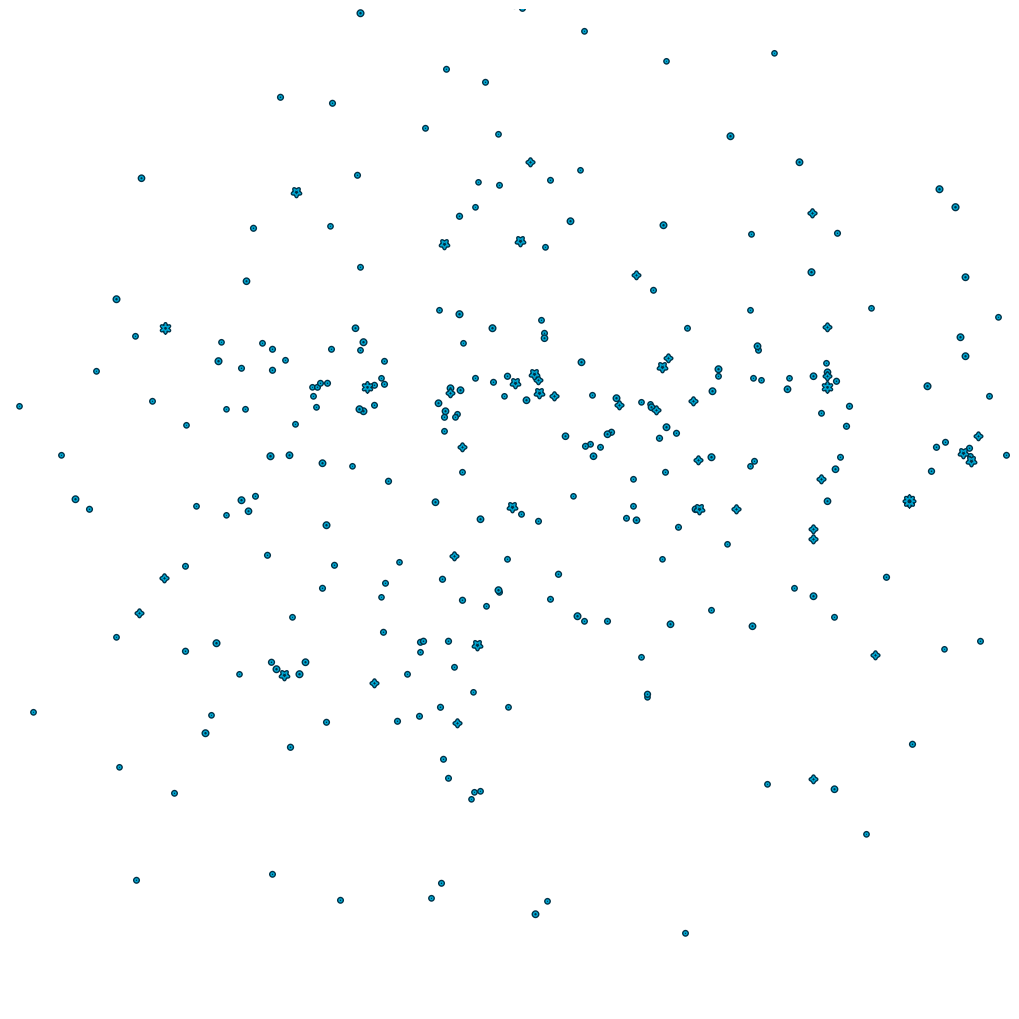

In [99]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

stars_var = stars[pd.notnull(stars['var'])]
print(len(stars_var), 'variable stars to overplot')

for index, row in stars_var.iterrows(): 
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=Colors.SPACE.value, lw=3, edgecolor=Colors.SPACE.value, zorder=6.5-row['mag'])
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=Colors.SPACE.value, edgecolor=Colors.C2.value, lw=1, zorder=6.5-row['mag'])
    
ax.set_xlim(ax.get_xlim()[::-1])

filepath = './figures/variable_stars.svg'

set_save_image(fig, filepath)
#patch_affinity_svg(filepath) # no text, so no patching

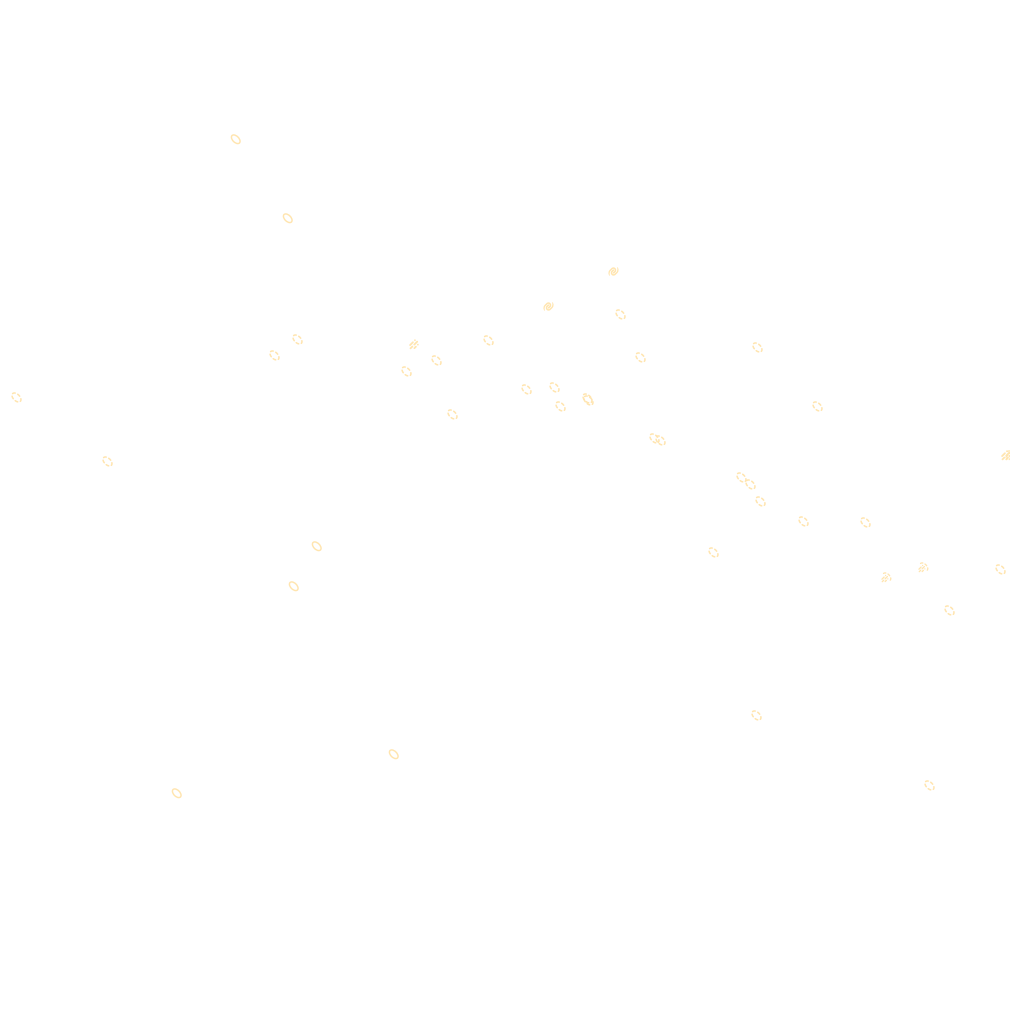

In [100]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

for index, row in messiers.iterrows(): 

    # print(row['type'])
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = size_messier, marker = get_messier_marker(row['type']), color=Colors.C1.value, lw = 0, zorder=6.5-row['magnitude'])

ax.set_xlim(ax.get_xlim()[::-1])
filepath = './figures/messier.svg'

set_save_image(fig, filepath)

NameError: name 'prop_seguihis' is not defined

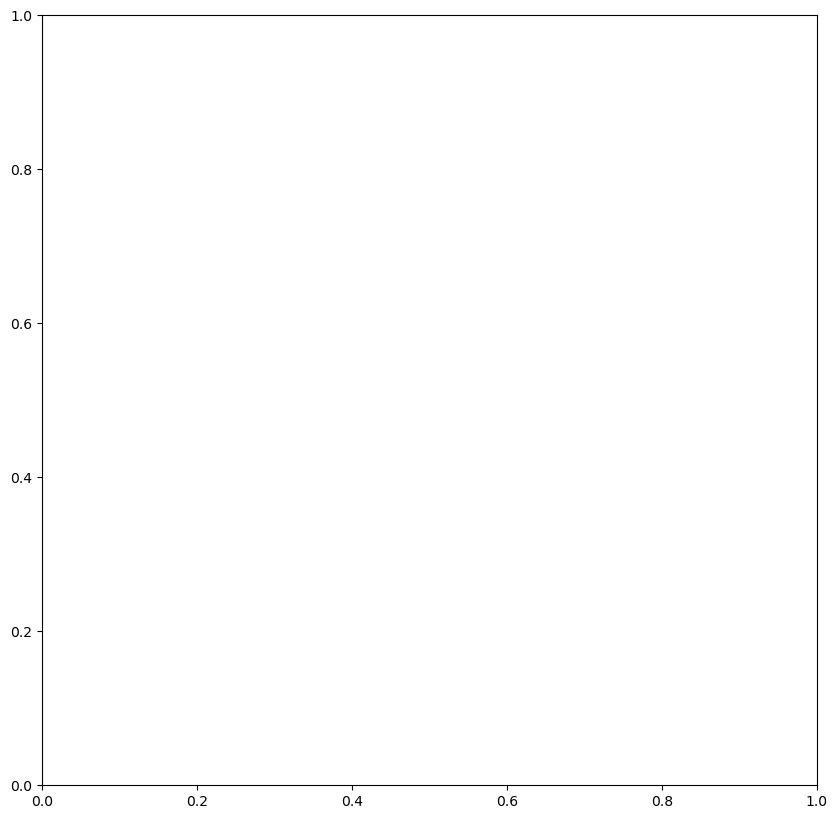

In [101]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Key for non-star object codes
codes = messiers.drop_duplicates(subset='type', keep='first')
codes.reset_index(inplace=True)
for index, row in codes.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(0, index, row['code']+" "+row['type'], alpha=1, fontsize=12, 
            color=other_color, ha='left', va='center', fontproperties=fontprop)
    
# Keys for star sizes
mags = np.arange(0, 6.55, 0.5)
for index, mag in enumerate(mags): 
    # Numbers
    if index % 2 == 0:
        ax.text(2+index/15, 2, mag, ha='center', va='center')
    
    # Key for variable star sizes
    ax.text(2+index/15, 0, u"\u16BC", fontproperties=prop_seguihis, fontsize=(12-mag), 
            alpha=max(0.1, min(1,((6.5-mag)*5)/(6.5*5))), color='k', ha='center', va='center')

    # Key for normal star sizes
    ax.scatter(2+index/15, 1, s=(6.5-mag)*5, color='k', lw=0, edgecolor='none', 
               alpha=min(1, ((6.5-mag)*5)/(6.5*5)))
    ax.scatter(2+index/15, 1, alpha=1, s=(6.5-mag)*5, edgecolor='k', lw=0.5, facecolor='none')

# Key for colors
cols = stars.drop_duplicates(subset='color', keep='first')
cols.reset_index(inplace=True)
for index, row in cols.iterrows(): 
    ax.scatter(3.5, index/2, s=6.5*5, lw=0.5, 
               edgecolor=row['linecolor'], color=row['color'])
    ax.text(3.6, index/2, row['spect_desig'], ha='left', va='center', color=row['color'])

# Key to zodiac colors
ax.plot([5, 6], [0, 0], color=zodiac_color, lw=0.5)
ax.plot([5, 6], [1, 1], color=nonzodiac_color, lw=0.5)
ax.plot([5, 6], [2, 2], color=const_color, lw=0.5)

# Key for colors
cols = stars.drop_duplicates(subset='greek_letters', keep='first')
cols.reset_index(inplace=True)
letterlist = cols['greek_letters'].tolist()
letterlist = [x for x in letterlist if len(str(x)) == 1]
letterlist = " ".join(letterlist)
ax.text(4, 4, letterlist, ha='left', va='center', color=row['color'])

ax.set_xlim(0, 10)
ax.set_ylim(-1, 20)
set_save_image(fig, './figures/key.pdf')

In [ ]:
savename = './figures/gridlines.png'

fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))
# ax.set_global()
#ax.background_patch.set_fill(False)

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_delim = np.arange(-90, 90.01, 0.1)
lon_delim = np.arange(-180, 180.01, 0.1)

for lg in lat_large: 
    ax.plot(lon_delim, [lg]*len(lon_delim), transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot(lon_delim, [sm]*len(lon_delim), transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)
for lg in lon_large: 
    ax.plot([lg]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)

set_save_image(fig, savename)

In [ ]:
savename = './figures/gridlines_labels.pdf'

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
shift = 20.242874009/20
shift_y = 360*(shift/2)-180
shift_x = 180*(shift/2)-90

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lon_mini = np.arange(-180, 181, 0.1*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_mini = np.arange(-90, 91, 1)

for lg in lat_large: 
    ax.plot([-180-shift_x, -180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(-180-shift_x, lg, str(lg)+"°", rotation=-90,
            color='k', alpha=0.35, ha='right', va='top', clip_on=False, fontsize=2)
    ax.plot([180+shift_x, 180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(180+shift_x, lg, str(lg)+"°", rotation=90,
            color='k', alpha=0.35, ha='left', va='top', clip_on=False, fontsize=2)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot([-180-shift_x*0.5, -180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.5, 180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lat_mini: 
    if (m not in lat_large) and (m not in lat_small): 
        ax.plot([-180-shift_x*0.25, -180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.25, 180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for i, lg in enumerate(lon_large): 
    hr = int(24 - i)
    ax.plot([lg]*2, [-90-shift_y*0.5, -90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, -90-shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
    ax.plot([lg]*2, [90+shift_y*0.5, 90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, 90+shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*2, [-90-shift_y*0.5, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([sm]*2, [90+shift_y*0.5, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lon_mini: 
    if (m not in lon_large) and (m not in lon_small): 
        ax.plot([m]*2, [-90-shift_y*0.25, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([m]*2, [90+shift_y*0.25, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)

set_save_image(fig, savename)